In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("amazon.csv")

In [21]:
# Question 1: What are the dimensions of the dataset?
df.shape

(1465, 16)

In [22]:
# Question 2: What are the column names?
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [23]:
# Question 3: Are there any missing values in the dataset?
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [24]:
# Question 4: What are the data types of the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [25]:
# Question 5: What are the summary statistics of the dataset?
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [27]:
df["discounted_price"]=df["discounted_price"].replace({"\₹":" ",",":""}, regex=True).astype(float)


In [28]:
df["actual_price"]=df["actual_price"].replace({"\₹":" ",",":""},regex = True).astype(float)

In [40]:
df.dropna(inplace = True)


In [35]:
df["rating"] = pd.to_numeric(df["rating"].replace({'\|': '', ',': ''}, regex=True), errors='coerce').fillna(0).astype(float)


In [36]:
df["rating_count"] = pd.to_numeric(df["rating_count"].replace({'\|': '', ',': ''}, regex=True), errors='coerce').fillna(0).astype(int)


In [37]:
df["discount_percentage"] = df["discount_percentage"].str.rstrip('%').astype(float) / 100


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category             1463 non-null   object 
 3   discounted_price     1463 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1463 non-null   float64
 6   rating               1463 non-null   float64
 7   rating_count         1463 non-null   int32  
 8   about_product        1463 non-null   object 
 9   user_id              1463 non-null   object 
 10  user_name            1463 non-null   object 
 11  review_id            1463 non-null   object 
 12  review_title         1463 non-null   object 
 13  review_content       1463 non-null   object 
 14  img_link             1463 non-null   object 
 15  product_link         1463 non-null   o

In [39]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,3129.277122,5451.068544,0.476507,4.093917,18295.541353
std,6948.222850,10881.018448,0.216224,0.308582,42753.864952
min,39.000000,39.000000,0.000000,0.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1690.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4312.500000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


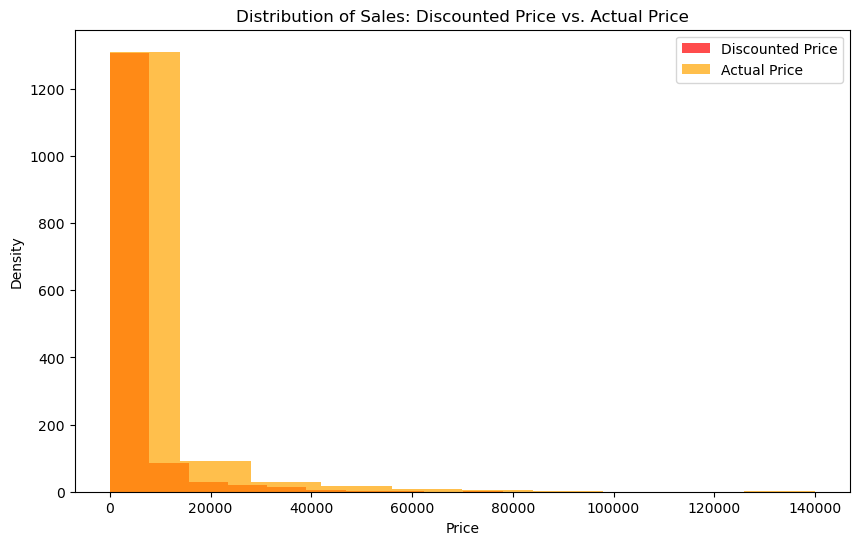

In [47]:
# Question 6: What is the distribution of sales (discounted price vs. actual price)?
plt.figure(figsize=(10, 6)) 

#sns.kdeplot(data=df["discounted_price"], label="Discounted Price", shade=True)
#sns.kdeplot(data=df["actual_price"], label="Actual Price", shade=True)
#sns.violinplot(data=df[["discounted_price", "actual_price"]], palette=['blue', 'orange'], inner='quartile')
#sns.ecdfplot(data=df["discounted_price"], label='Discounted Price', color='blue', linestyle='-', marker='o')
#sns.ecdfplot(data=df["actual_price"], label='Actual Price', color='orange', linestyle='-', marker='o')
plt.hist(df["discounted_price"], bins=10, alpha=0.7, label="Discounted Price", color="Red")
plt.hist(df["actual_price"], bins=10, alpha=0.7, label="Actual Price", color="Orange")



# Set the title and labels for x and y axes
plt.title('Distribution of Sales: Discounted Price vs. Actual Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [49]:
# Question 7: What are the top-selling products?
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,0.43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,1899.0,0.90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.0,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.00,1000.0,0.85,3.9,24871,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,0.65,4.1,15188,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_40237.

No transaction data avialable 

In [56]:
# Question 8: What is the distribution of sales by product category?
dist_sales = df["category"].value_counts()

C:\Users\Owais Akram\AppData\Local\Temp\ipykernel_12344\729143621.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


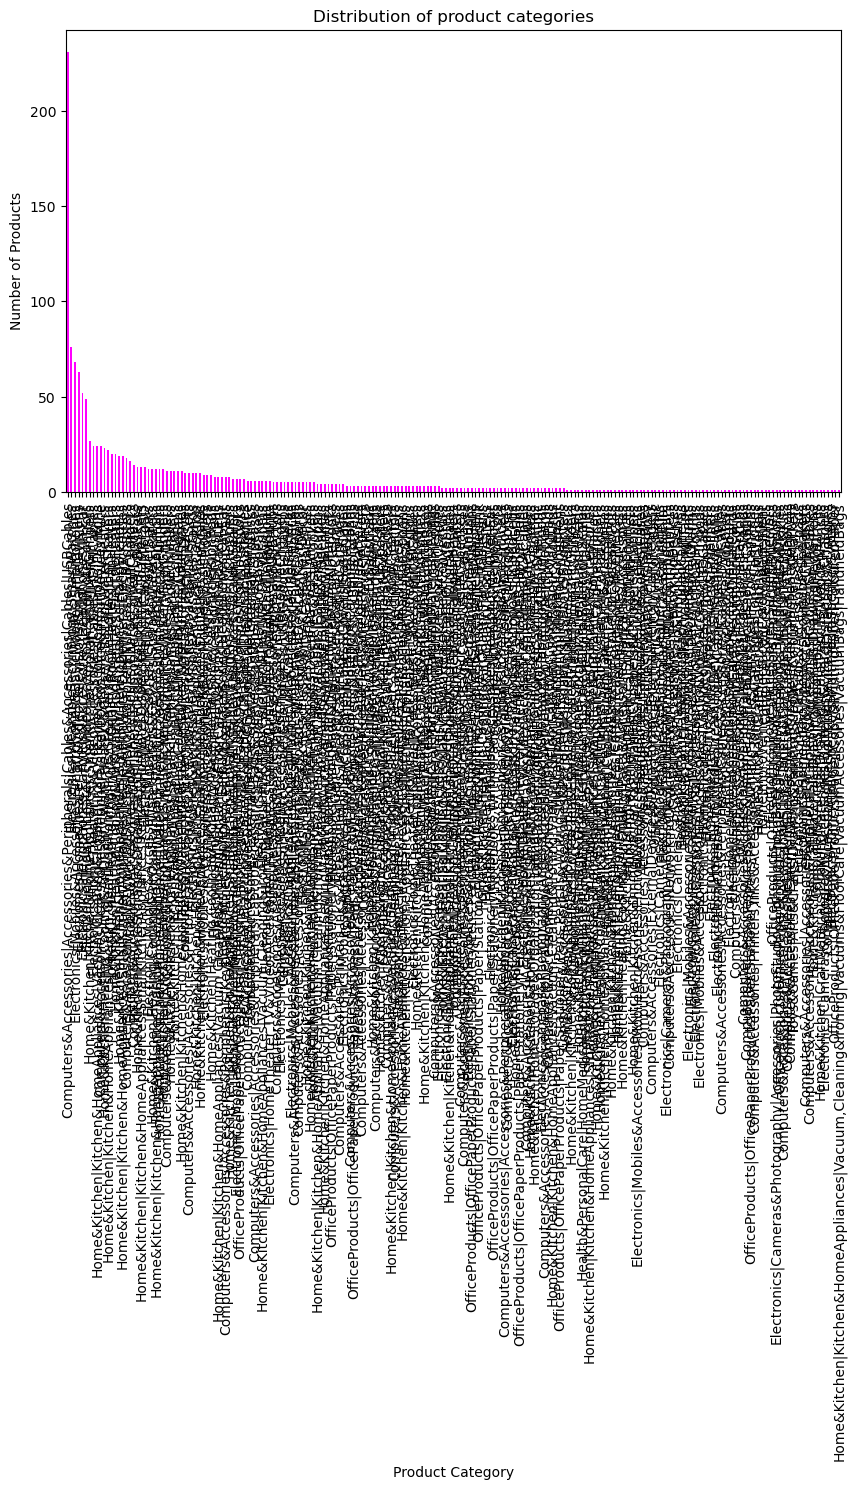

In [58]:
plt.figure(figsize=(10, 6))
dist_sales.plot(kind='bar', color='magenta')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title("Distribution of product categories")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [64]:
# Question 9: What is the average rating and rating count for products?
average_rating=df["rating"].median()
rating_count=df["rating_count"].median()
print("The average_rating is:", average_rating)
print("The average rating count is ",rating_count)
print("Here i have chosen median instead of mean as the distribution is skewed")

The average_rating is: 4.1
The average rating count is  5179.0
Here i have chosen median instead of mean as the distribution is skewed


In [83]:
# Question 10: What is the distribution of products across different categories?
df["category1"] = df["category"].apply(lambda x: x.split("|")[0])

prod_count = df["category1"].value_counts()

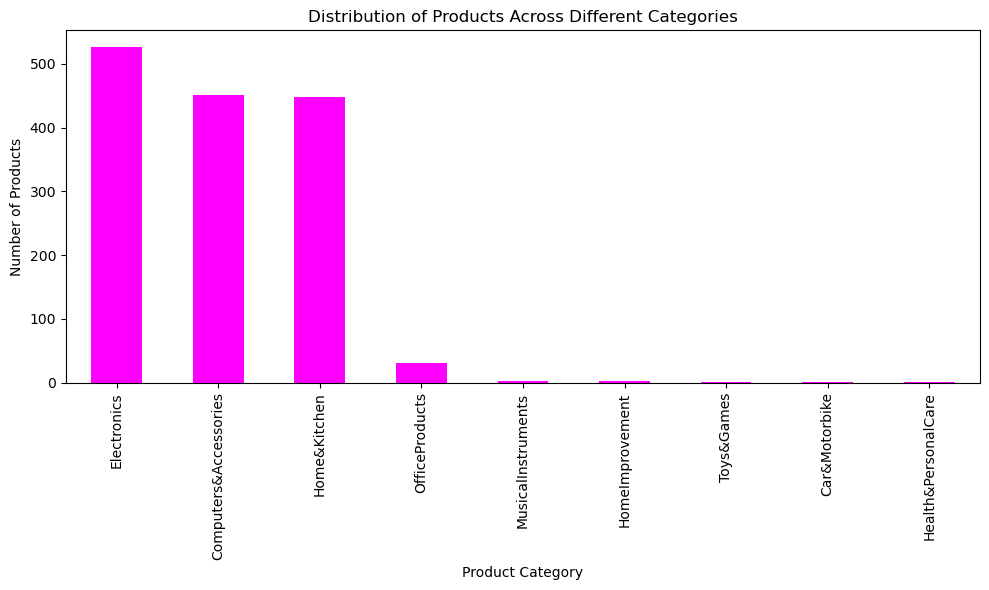

In [86]:
plt.figure(figsize=(10, 6))
prod_count.plot(kind="bar", color="magenta")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.title("Distribution of Products Across Different Categories")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'rating'),
  Text(1.5, 0, 'rating_count'),
  Text(2.5, 0, 'discounted_price')])

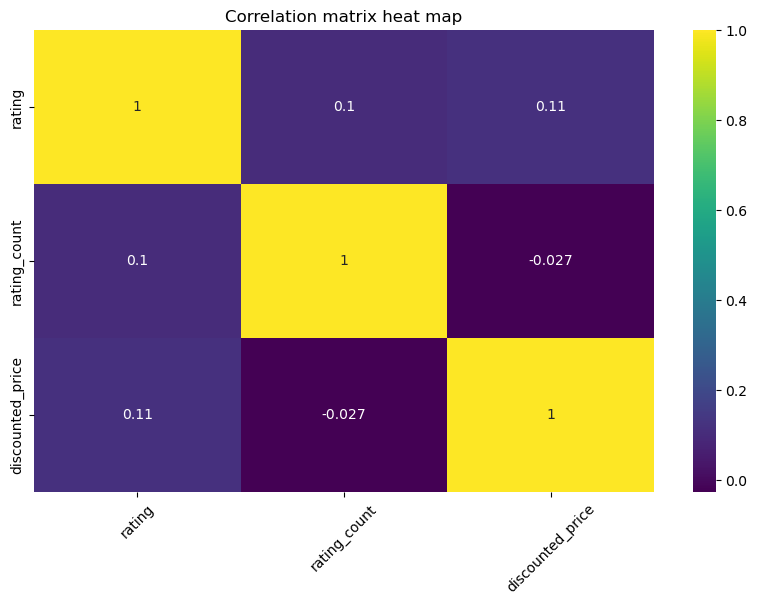

In [87]:
# Question 11: What is the correlation between ratings, rating count, and discounted price?
corr = df[["rating","rating_count","discounted_price"]].corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot = True, cmap ="viridis")
plt.title("Correlation matrix heat map")
plt.xticks(rotation=45)


In [91]:
# Question 12: What are the top-rated products with a high number of ratings?
trp = df.sort_values(by=["rating","rating_count"],ascending=[False, False])

In [92]:
#showcasing top 10 prodcuts
trp.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1
775,B09ZHCJDP1,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,499.0,1000.0,0.50,5.0,23,Reliable wireless connection up to 10m|Advance...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,https://www.amazon.in/Wireless-Connection-Batt...,Computers&Accessories
174,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,399.0,1999.0,0.80,5.0,5,This sturdy and durable cable made of tpe and ...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...,https://www.amazon.in/Syncwire-Cable-Charging-...,Computers&Accessories
1145,B0BR4F878Q,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",1439.0,1999.0,0.28,4.8,53803,✔Quick Electric Hot Water Tap Heating tube: hi...,"AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NM...","Yogita g.,Amazon Customer,Mimsy","R2WHW4PEF14WOD,R2DCCZWUGI0O0K,R1FA1HH6VL1RAL","Best Product,It’s expansive but it works well ...",Must buy best Fabulous product I recommend thi...,https://m.media-amazon.com/images/I/41+t2HWvwF...,https://www.amazon.in/Swiffer-Instant-Electric...,Home&Kitchen
1299,B0B53DS4TF,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4995.0,20049.0,0.75,4.8,3964,VOLTAGE (230 Volts): Instant Vortex Air Fryer ...,"AGXJAYXZKJ6NCPSLX57MXJLQ3F6Q,AEQYSJWBP6DN2IV2L...","nikhil,Rituja Ray,Prasan Krishnan Karthikeyan,...","R2FHIBV8JE4CTB,R315K0BCU0KVKO,RD129PA7KQQOR,R3...","Loved it,Good product,Good product,It's easy t...",I have used multiple air fryers. But this one ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Instant-Vortex-2QT-EvenC...,Home&Kitchen
1201,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,279.0,499.0,0.44,4.8,28,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Oratech-electric-cappucc...,Home&Kitchen
459,B0B23LW7NV,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics|Mobiles&Accessories|MobileAccessor...,999.0,2899.0,0.66,4.7,7779,Compatibility ; Glass Screen Protector Compati...,"AGQIXFPHABUZ2WPETGRYDB7VSMXA,AECPF7WFMUQ3TR7YT...","VK,Siddhi Prabhudesai,Prashant Nair,Srihare,Ni...","R13CIOIUD1D8UM,R17AIJTSM1FUNS,R3AJ1T3JVA8O9V,R...","Easy to install,Best screen guard and the easi...",It is easy to install at home. The kit has all...,https://m.media-amazon.com/images/I/51EiPNlJDg...,https://www.amazon.in/Spigen-Tempered-Screen-P...,Electronics
249,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,0.44,4.7,5935,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...","David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...","R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...,The delivery 

In [93]:
# Question 13: What is the distribution of products by discount percentage?
dp = df.groupby(["discount_percentage"],as_index= False)["product_name"].count()

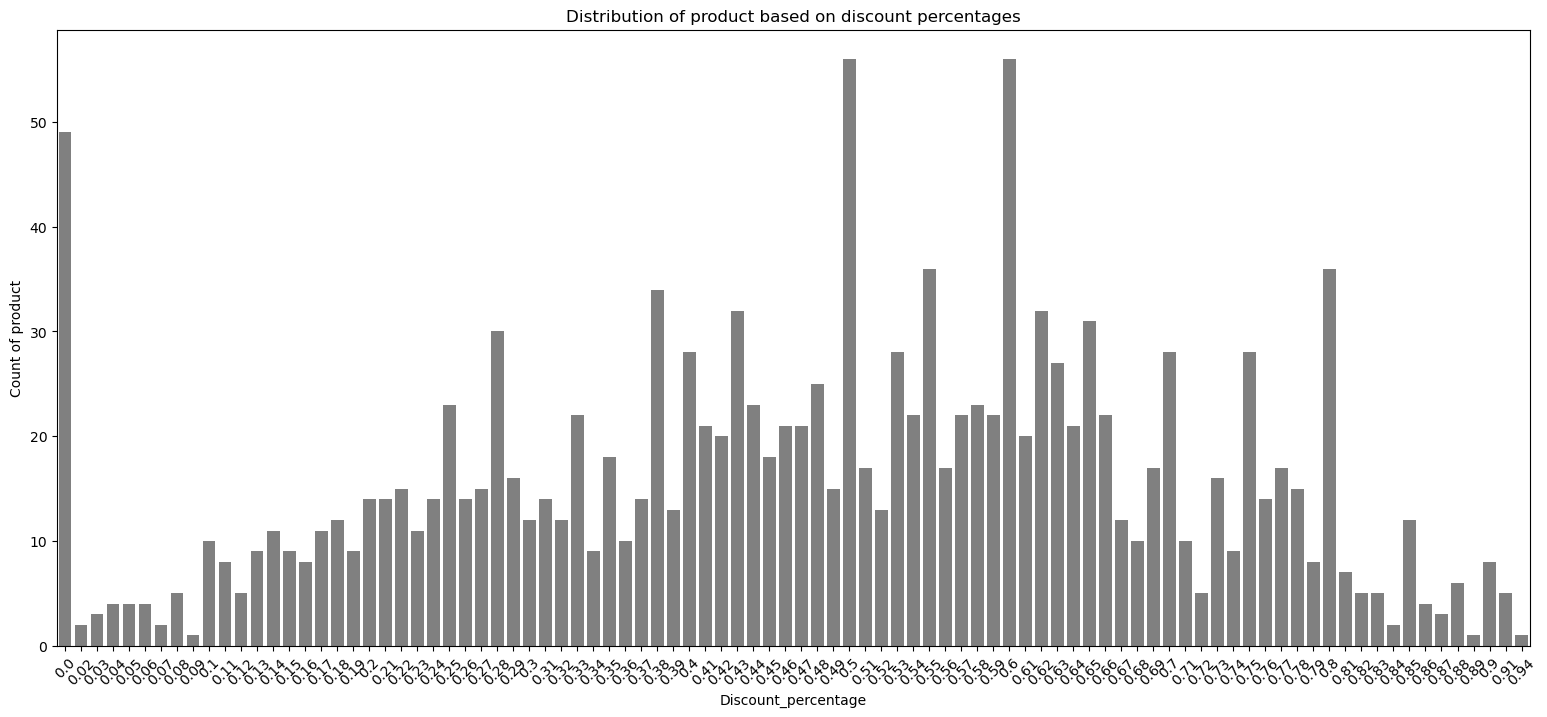

In [105]:
plt.figure(figsize=(19, 8))
sns.barplot(data = dp, x= dp["discount_percentage"],y=dp["product_name"],color = "Gray")
plt.title("Distribution of product based on discount percentages")
plt.xticks(rotation=45)
plt.xlabel("Discount_percentage")
plt.ylabel("Count of product")
plt.show()

In [112]:
# Question 14: What is the average discount percentage by category?
dpc = df.groupby(["category1"],as_index = False)["discount_percentage"].median()

In [113]:
dpc

,category1,discount_percentage
0,Car&Motorbike,0.420
1,Computers&Accessories,0.570
2,Electronics,0.540
3,Health&PersonalCare,0.530
4,Home&Kitchen,0.415
5,HomeImprovement,0.575
6,MusicalInstruments,0.460
7,OfficeProducts,0.050
8,Toys&Games,0.000


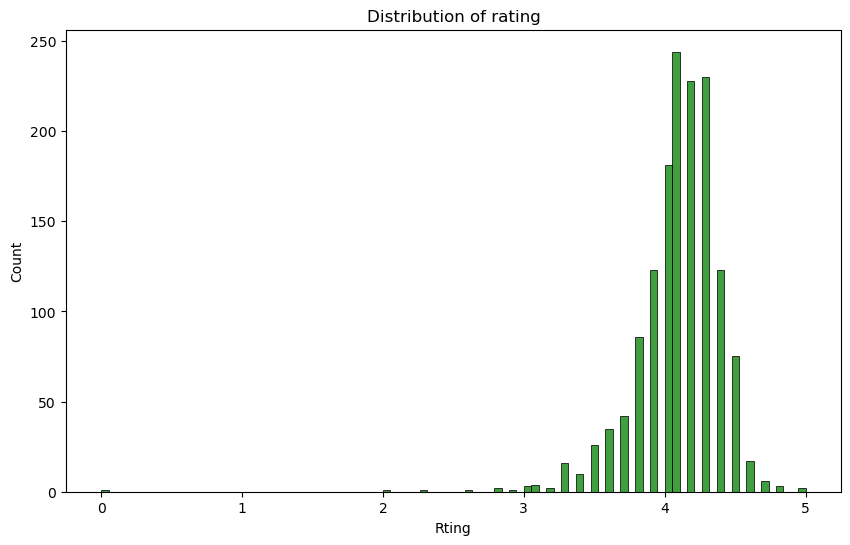

In [128]:
# Question 15: What is the distribution of ratings for products?
plt.figure(figsize = (10,6))
sns.histplot(data=df,x=df["rating"],color = "Green")
plt.title("Distribution of rating")
plt.xlabel("Rting")
plt.ylabel("Count")
plt.show()

In [133]:
# Question 16: What is the average rating by category?
arc = df.groupby(["category1"],as_index = False)["rating"].median()

In [134]:
arc

,category1,rating
0,Car&Motorbike,3.80
1,Computers&Accessories,4.20
2,Electronics,4.10
3,Health&PersonalCare,4.00
4,Home&Kitchen,4.10
5,HomeImprovement,4.25
6,MusicalInstruments,3.90
7,OfficeProducts,4.30
8,Toys&Games,4.30


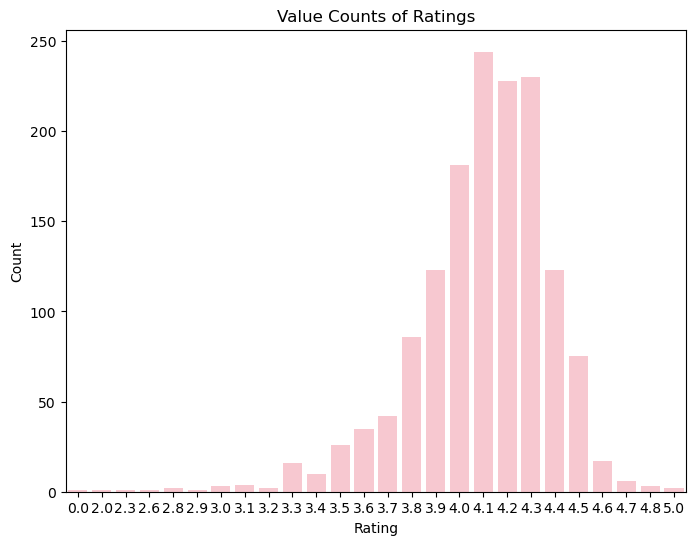

In [145]:
# Question 17: What are the most common rating counts for products?
mcrc = df["rating"].value_counts()
plt.figure(figsize=(8, 6)) 
sns.barplot(x=mcrc.index, y=mcrc.values, color="pink")
plt.title("Value Counts of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


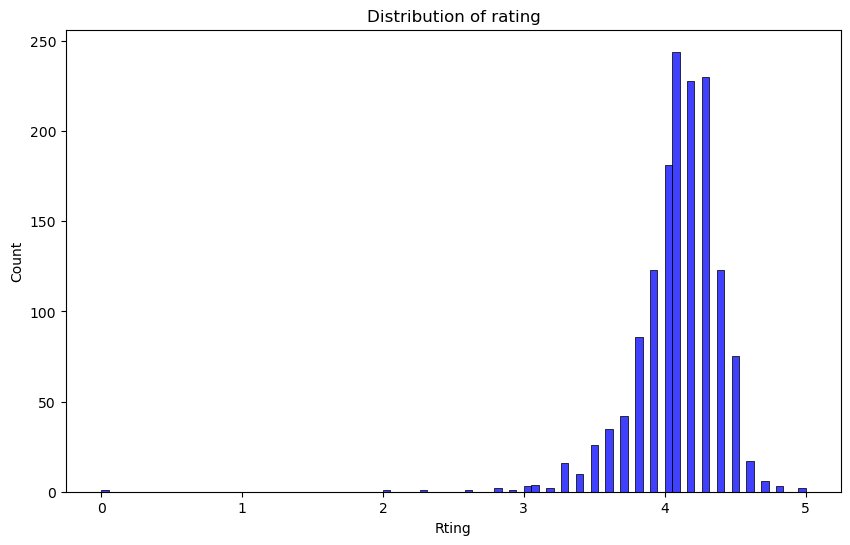

In [146]:
# Question 18: What is the distribution of user ratings?
plt.figure(figsize = (10,6))
sns.histplot(data=df,x=df["rating"],color = "Blue")
plt.title("Distribution of rating")
plt.xlabel("Rting")
plt.ylabel("Count")
plt.show()

In [147]:
# Question 19: What are the top-rated products with the highest discounts?
trpwhd = df.sort_values(["rating", "discount_percentage"], ascending=[False, False])
trpwhd.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1
174,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,399.0,1999.0,0.80,5.0,5,This sturdy and durable cable made of tpe and ...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...,https://www.amazon.in/Syncwire-Cable-Charging-...,Computers&Accessories
775,B09ZHCJDP1,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,499.0,1000.0,0.50,5.0,23,Reliable wireless connection up to 10m|Advance...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,https://www.amazon.in/Wireless-Connection-Batt...,Computers&Accessories
1299,B0B53DS4TF,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4995.0,20049.0,0.75,4.8,3964,VOLTAGE (230 Volts): Instant Vortex Air Fryer ...,"AGXJAYXZKJ6NCPSLX57MXJLQ3F6Q,AEQYSJWBP6DN2IV2L...","nikhil,Rituja Ray,Prasan Krishnan Karthikeyan,...","R2FHIBV8JE4CTB,R315K0BCU0KVKO,RD129PA7KQQOR,R3...","Loved it,Good product,Good product,It's easy t...",I have used multiple air fryers. But this one ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Instant-Vortex-2QT-EvenC...,Home&Kitchen
1201,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,279.0,499.0,0.44,4.8,28,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Oratech-electric-cappucc...,Home&Kitchen
1145,B0BR4F878Q,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",1439.0,1999.0,0.28,4.8,53803,✔Quick Electric Hot Water Tap Heating tube: hi...,"AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NM...","Yogita g.,Amazon Customer,Mimsy","R2WHW4PEF14WOD,R2DCCZWUGI0O0K,R1FA1HH6VL1RAL","Best Product,It’s expansive but it works well ...",Must buy best Fabulous product I recommend thi...,https://m.media-amazon.com/images/I/41+t2HWvwF...,https://www.amazon.in/Swiffer-Instant-Electric...,Home&Kitchen
459,B0B23LW7NV,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics|Mobiles&Accessories|MobileAccessor...,999.0,2899.0,0.66,4.7,7779,Compatibility ; Glass Screen Protector Compati...,"AGQIXFPHABUZ2WPETGRYDB7VSMXA,AECPF7WFMUQ3TR7YT...","VK,Siddhi Prabhudesai,Prashant Nair,Srihare,Ni...","R13CIOIUD1D8UM,R17AIJTSM1FUNS,R3AJ1T3JVA8O9V,R...","Easy to install,Best screen guard and the easi...",It is easy to install at home. The kit has all...,https://m.media-amazon.com/images/I/51EiPNlJDg...,https://www.amazon.in/Spigen-Tempered-Screen-P...,Electronics
1226,B0BLC2BYPX,Zuvexa USB Rechargeable Electric Foam Maker - ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,499.0,1299.0,0.62,4.7,54,The food taste stainless steel whisking head i...,"AG6AS2KLLZMPPPEKF5RIJXTMA4FA,AEW6BC4YLRYKI5OZG...","shammi,Rippy Mittal,Kabeer,Kush,Vani Prabha,ne...","R1M11VMLH6I3TN,R2OLOOGNHQ37ZA,R3PIVKT8BNMA4G,R...","Little kitchen helper,An amazing product,Very ...",The first time I 

In [157]:
# Question 20: What is the average discounted price by category?
adpbc = df.groupby(["category1"],as_index = False)["discounted_price"].mean()

In [158]:
adpbc

,category1,discounted_price
0,Car&Motorbike,2339.000000
1,Computers&Accessories,845.393836
2,Electronics,5965.887833
3,Health&PersonalCare,899.000000
4,Home&Kitchen,2330.615647
5,HomeImprovement,337.000000
6,MusicalInstruments,638.000000
7,OfficeProducts,301.580645
8,Toys&Games,150.000000


In [161]:
# Question 21: What is the average discount percentage across all products?
adpaap = df["discount_percentage"].mean()

In [163]:
print("The average discount percentage across all products is ",(adpaap*100))

The average discount percentage across all products is  47.65071770334928
